In [1]:
import os

# --- Add these lines at the very top of your script ---
# This must be done BEFORE importing numpy or other scientific libraries.
os.environ['OMP_NUM_THREADS'] = '1'

os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
from NEGF_device_generation import UnitCell
from device import Device
from device_hamiltonian import Hamiltonian
from lead_self_energy import LeadSelfEnergy
from charge import Charge
from rgf import GreensFunction

In [11]:
dev = Device(0.5431 * 10e-9, 0.5431 * 10e-9, 0.5431 * 10e-9, equilibrium=True)
ham = Hamiltonian(dev) 
charge_obj =Charge(dev)

gf = GreensFunction(dev, hamiltonian=ham)

sum(gf.compute_density_of_states(E=2, equilibrium=True))


KeyboardInterrupt: 

In [ ]:
unitCell.danglingBonds

ham.create_sparse_channel_hamlitonian(unitCell)

{Atom(0, 0, 0): [(Atom(0.25, -0.25, -0.25), 1),
  (Atom(-0.25, 0.25, -0.25), 2),
  (Atom(-0.25, -0.25, 0.25), 3)],
 Atom(0.0, 0.5, 0.5): [(Atom(-0.25, 0.75, 0.25), 2),
  (Atom(-0.25, 0.25, 0.75), 3)],
 Atom(0.25, 0.25, 0.25): [],
 Atom(0.25, 0.75, 0.75): [(Atom(0.0, 1.0, 1.0), 1),
  (Atom(0.5, 0.5, 1.0), 2),
  (Atom(0.5, 1.0, 0.5), 3)],
 Atom(0.5, 0.0, 0.5): [(Atom(0.75, -0.25, 0.25), 1),
  (Atom(0.25, -0.25, 0.75), 3)],
 Atom(0.5, 0.5, 0.0): [(Atom(0.75, 0.25, -0.25), 1),
  (Atom(0.25, 0.75, -0.25), 2)],
 Atom(0.75, 0.25, 0.75): [(Atom(0.5, 0.5, 1.0), 1),
  (Atom(1.0, 0.0, 1.0), 2),
  (Atom(1.0, 0.5, 0.5), 3)],
 Atom(0.75, 0.75, 0.25): [(Atom(0.5, 1.0, 0.5), 1),
  (Atom(1.0, 0.5, 0.5), 2),
  (Atom(1.0, 1.0, 0.0), 3)]}

In [ ]:
lse = LeadSelfEnergy(dev, ham)

In [14]:
lse.self_energy("right", 0, method="iterative")

array([[-6.18028982e+00-6.63629497e-06j, -3.97718866e+00-4.09003707e-06j,
        -5.19899829e+00-6.09865740e-06j, ...,
         3.95333511e-03-4.73470137e-09j,  4.20714561e-03+1.17101471e-08j,
         4.97833603e-03-2.04535948e-09j],
       [-3.97718866e+00-4.09003707e-06j, -3.36414675e+00-2.83405402e-06j,
        -3.02504818e+00-3.61898400e-06j, ...,
         2.73029029e-03-5.55617013e-09j,  3.25468405e-03+7.04796809e-09j,
         3.39165773e-03-4.25805246e-09j],
       [-5.19899829e+00-6.09865740e-06j, -3.02504818e+00-3.61898400e-06j,
        -4.90027298e+00-5.83852921e-06j, ...,
         3.09722404e-03+4.05224857e-11j,  2.52345692e-03+1.28224648e-08j,
         4.06259376e-03+3.13907592e-09j],
       ...,
       [ 3.95333511e-03-4.73470137e-09j,  2.73029029e-03-5.55617013e-09j,
         3.09722404e-03+4.05224857e-11j, ...,
        -2.17743262e+00-6.49474871e-07j,  9.43870702e-01+2.75069082e-08j,
        -2.02563787e-01-2.78636115e-07j],
       [ 4.20714561e-03+1.17101471e-08j,  3.

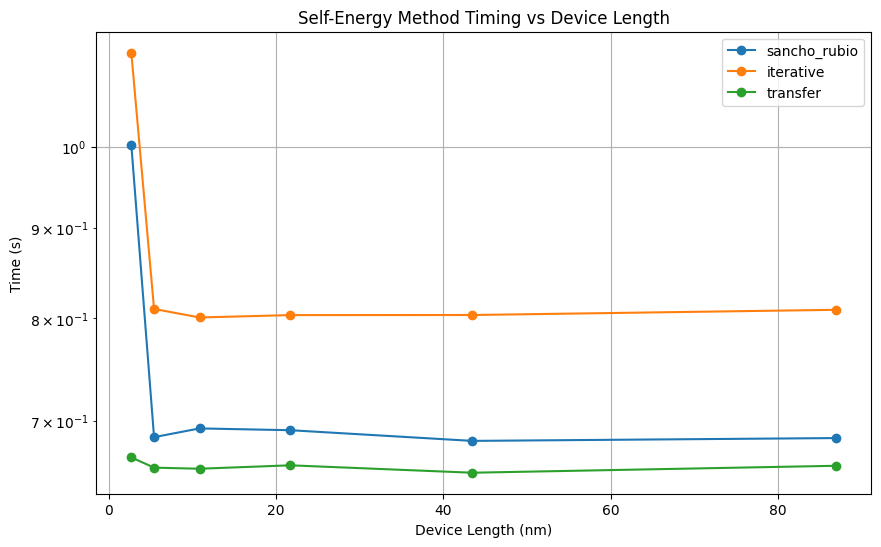

In [16]:
import time

import matplotlib.pyplot as plt

methods = ["sancho_rubio", "iterative", "transfer"]
lengths = [0.5431 * n * 1e-9 for n in [5, 10, 20, 40, 80, 160]]
timings = {method: [] for method in methods}

for L in lengths:
    dev_test = Device(L, 0.5431 * 2e-9, 0.5431 * 5e-9)
    ham_test = Hamiltonian(dev_test)
    for method in methods:
        lse_test = LeadSelfEnergy(dev_test, ham_test)
        start = time.time()
        try:
            lse_test.self_energy("right", 0, method=method)
        except Exception as e:
            timings[method].append(float('nan'))
            continue
        end = time.time()
        timings[method].append(end - start)

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot([L * 1e9 for L in lengths], timings[method], marker='o', label=method)
plt.xlabel('Device Length (nm)')
plt.ylabel('Time (s)')
plt.title('Self-Energy Method Timing vs Device Length')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

In [17]:
energy, DOS = charge_obj.calculate_DOS()


Calculating DOS with 200 
Using sancho_rubio method for surface Green's functions
Starting DOS calculations for 200 energy pts...
DOS calculation completed in 45.06 seconds
DOS data saved to dos_data.txt


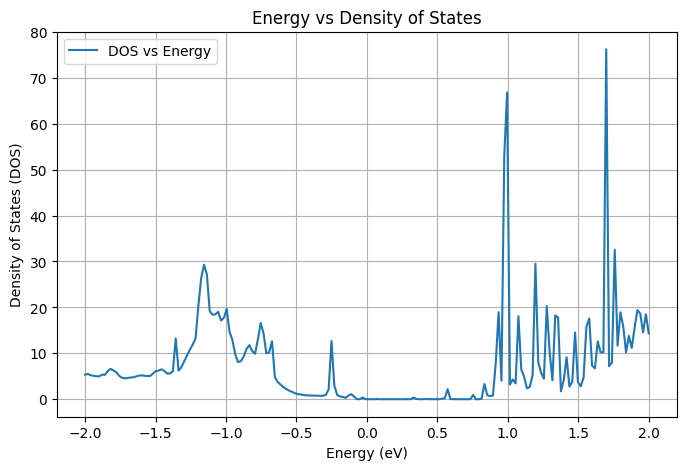

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(energy, DOS, label='DOS vs Energy')
plt.xlabel('Energy (eV)')
plt.ylabel('Density of States (DOS)')
plt.title('Energy vs Density of States')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from rgf import GreensFunction

GF = GreensFunction(dev, ham, self_energy_method="sancho_rubio")

sum(GF.compute_density_of_states(1.2))

np.float64(3.7212487289909952)